In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
train = pd.read_csv('/gdrive/My Drive/Data/Train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
test = pd.read_csv('/gdrive/My Drive/Data/Test.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (17521, 2395)
Test shape: (20442, 2394)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,9.293496,8.570479,10.063117,10.271758,0.548538,0.403366,NaN,NaN,1.486524,1.728324,0.993441,1.297050,0.137398,0.115987,0.260428,1.414214,1,1,1,1,1,1,0,6,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,12.462385,12.280493,12.167132,12.136876,1.167898,2.676398,NaN,NaN,0.792123,0.934556,0.893203,0.966620,0.753892,0.808295,1.414214,NaN,1,1,3,4,4,0,4,5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,16.496090,16.749305,16.532874,16.128357,1.145182,2.203874,NaN,NaN,0.422264,0.498347,0.683582,0.735339,0.808115,0.776910,1.414214,NaN,3,3,4,12,4,0,2,4,NaN,1.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,13.419061,13.624018,13.541837,13.429097,1.204010,0.536304,NaN,NaN,0.437243,0.521341,0.623499,0.534531,-0.125829,0.388830,-1.414214,NaN,2,2,2,24,1,0,1,4,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,NaN,14.764533,14.551021,NaN,NaN,NaN,NaN,NaN,NaN,1.344637,NaN,1.563430,-0.113101,0.617486,1.414214,NaN,4,3,4,68,8,0,2,4,NaN,3.0,NaN,NaN,...,0,0,0,0,0,0,2,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [5]:
# to get object dtype columns

for x in train.columns:
    if train[x].dtype == type(object):
        print(x)

Col1
Col747
Col836


In [6]:
# to see obejct datatype col
for x in test.columns:
    if train[x].dtype == type(object):
        print(x)

Col1
Col747
Col836


In [7]:
# checking missing data percentage in train data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train.head(2395)

,Total,Percent
Col485,17514,99.960048
Col813,17514,99.960048
Col724,17514,99.960048
Col288,17514,99.960048
Col266,17514,99.960048
Col463,17514,99.960048
Col171,17411,99.372182
Col930,17127,97.751270
Col40,17046,97.288968
Col38,17035,97.226186


In [8]:
# columns in training data having more than 70% null values
trn = train.columns[train.isnull().sum() > 12200]
print(trn)

Index(['Col19', 'Col20', 'Col28', 'Col37', 'Col38', 'Col39', 'Col40', 'Col41',
       'Col99', 'Col113',
       ...
       'Col845', 'Col847', 'Col848', 'Col852', 'Col853', 'Col857', 'Col858',
       'Col920', 'Col925', 'Col930'],
      dtype='object', length=194)


In [0]:
# dropping columns having more than 80% null values
train = train.drop(trn, axis=1)

In [10]:
train.shape

(17521, 2201)

In [0]:
test = test.drop(trn, axis=1)

In [12]:
test.shape

(20442, 2200)

In [13]:
# columns in test data having more than 70% null values
ten = test.columns[test.isnull().sum() > 14300]
print(ten)

Index(['Col685', 'Col690', 'Col695', 'Col701', 'Col760', 'Col774', 'Col779',
       'Col784', 'Col790', 'Col849'],
      dtype='object')


In [0]:
# dropping columns having more than 80% null values in test data still
train = train.drop(ten, axis=1)
test = test.drop(ten, axis=1)

In [15]:
train.shape,test.shape

((17521, 2191), (20442, 2190))

In [16]:
t = train.columns[train.isnull().sum() > 0]
print(t)
tt = test.columns[test.isnull().sum() > 0]
print(tt)


'''both dataset have null values remaining in same columns
'''

Index(['Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col21', 'Col22',
       'Col23', 'Col24',
       ...
       'Col926', 'Col931', 'Col932', 'Col933', 'Col2392', 'Col2393', 'Col2394',
       'Col2395', 'Col2396', 'Col2397'],
      dtype='object', length=555)
Index(['Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col21', 'Col22',
       'Col23', 'Col24',
       ...
       'Col926', 'Col931', 'Col932', 'Col933', 'Col2392', 'Col2393', 'Col2394',
       'Col2395', 'Col2396', 'Col2397'],
      dtype='object', length=555)


'both dataset have null values remaining in same columns\n'

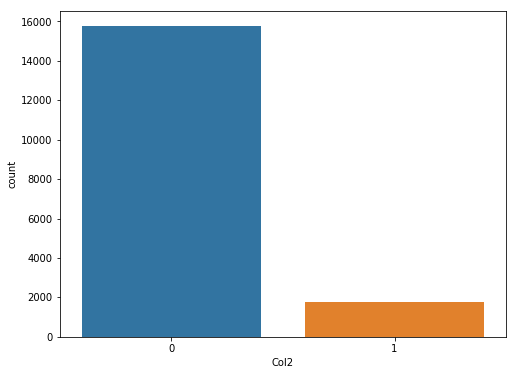

In [17]:
plt.figure(figsize = (8,6))
sns.countplot(train['Col2'])
plt.show()

In [0]:
zero_class = train[train['Col2'] == 1].shape[0]
one_class =  train[train['Col2'] == 0].shape[0]

In [19]:
print('0 class  = ',zero_class )
print('1 class = ',one_class)

0 class  =  1761
1 class =  15760


In [20]:
print('proportion of 1 class = ', one_class/(one_class + zero_class)*100,'%')

proportion of 1 class =  89.94920381256777 %


In [21]:
# Print number of unique elements in each column
'''
for column in train.columns:
    print(train[column].nunique(),"  ", column)
'''

'\nfor column in train.columns:\n    print(train[column].nunique(),"  ", column)\n'

In [0]:
#633 columns have null values

In [0]:
# imputing missing values with mean of that column
train.fillna(train.mean(), inplace=True)

In [24]:
t = train.columns[train.isnull().sum() > 0]
print(t)

Index([], dtype='object')


In [0]:
test.fillna(test.mean(), inplace=True)

In [26]:
tt = test.columns[test.isnull().sum() > 0]
print(tt)



Index([], dtype='object')


In [0]:
x1 = train.drop(['Col1'],axis = 1)  # new training df
test = test.drop(['Col1'],axis = 1)

In [28]:
x1.shape,test.shape

((17521, 2190), (20442, 2189))

In [29]:
x1_tr = x1.copy().drop('Col2', axis=1)
y_tr = x1['Col2']
x1_tr.shape , test.shape

((17521, 2189), (20442, 2189))

In [0]:
# dropping correlated features

import numpy as np

# Create correlation matrix
corr_matrix = x1_tr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [31]:

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(len(to_drop))

1492


In [32]:
# Drop features 
x1_trr = x1_tr.drop(columns = to_drop, axis=1)
test_d = test.drop(columns =to_drop, axis=1)


x1_trr.shape,test_d.shape

((17521, 697), (20442, 697))

In [34]:
 from collections import Counter
    
print('Original dataset shape %s' % Counter(y_tr))

Original dataset shape Counter({0: 15760, 1: 1761})


#### By using 'ADASYN'( Adaptive Synthetic sampling approach) which is one of the oversampling techniques, I balanced the dataset and overcome the situation in which our model only predicts the majority class

In [0]:
'''
from imblearn.over_sampling import ADASYN 


sm = ADASYN()
X, y = sm.fit_sample(x1_tr, y_tr)
X = pd.DataFrame(X, columns = x1_tr.columns)
c = ['Col2']
y=pd.DataFrame(y,columns = c)
'''

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# y.Col2.value_counts()

0    15760
1    15478
Name: Col2, dtype: int64

In [0]:
 f# rom collections import Counter
    
print('Resamples dataset shape %s' % Counter(y['Col2']))

Resamples dataset shape Counter({0: 15760, 1: 15478})


In [0]:
# X.shape

(31238, 2267)

In [0]:
# X.head()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col42,Col43,Col44,Col45,Col46,Col47,Col48,Col49,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,9.293496,8.570479,10.063117,10.271758,0.548538,0.403366,1.486524,1.728324,0.993441,1.297050,0.137398,0.115987,0.260428,1.414214,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,6.070000,6.070000,2.0,3.0,2.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,214.0,214.0,68.0,22.0,22.0,7.0
1,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,12.462385,12.280493,12.167132,12.136876,1.167898,2.676398,0.792123,0.934556,0.893203,0.966620,0.753892,0.808295,1.414214,0.158979,1.0,1.0,3.0,4.0,4.0,0.0,4.0,5.0,116.650000,116.650000,3.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,41.0,38.0,12.0,12.0,11.0
2,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,16.496090,16.749305,16.532874,16.128357,1.145182,2.203874,0.422264,0.498347,0.683582,0.735339,0.808115,0.776910,1.414214,0.158979,3.0,3.0,4.0,12.0,4.0,0.0,2.0,4.0,33.280000,33.280000,2.0,1.0,2.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,378.0,378.0,310.0,21.0,21.0,16.0
3,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,13.419061,13.624018,13.541837,13.429097,1.204010,0.536304,0.437243,0.521341,0.623499,0.534531,-0.125829,0.388830,-1.414214,0.158979,2.0,2.0,2.0,24.0,1.0,0.0,1.0,4.0,-7.750000,-7.750000,2.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,702.0,702.0,644.0,951.0,951.0,743.0
4,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,9.303774,14.764533,14.551021,9.226015,1.077682,3.487721,1.017542,1.344637,0.760987,1.563430,-0.113101,0.617486,1.414214,0.158979,4.0,3.0,4.0,68.0,8.0,0.0,2.0,4.0,1103.390272,1002.768387,1.0,2.0,1.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [0]:
# y.head()

,Col2
0,1
1,0
2,0
3,0
4,0


# Normalisation of attributes


In [35]:
# Feature Scaling


# Splitting training dataset into train and test
X1 = x1_trr.copy()
y1 = x1['Col2']




from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc = StandardScaler()
mm = MinMaxScaler()
X_tr = mm.fit_transform(X1)
N_te = mm.transform(test_d.copy())

'''
X_train is the new normalised training data set without target variable
N_test is the normalised test data set'''

'\nX_train is the new normalised training data set without target variable\nN_test is the normalised test data set'

In [0]:
'''X_t = pd.DataFrame(X_tr, columns = X.columns)
X_t.head()'''

'X_t = pd.DataFrame(X_tr, columns = X.columns)\nX_t.head()'

#**PCA**

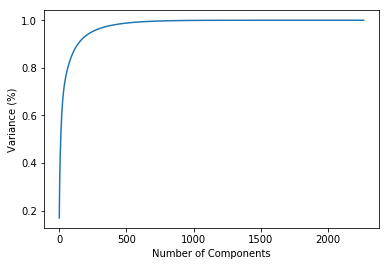

In [0]:
from sklearn.decomposition import PCA

'''
pca = PCA(n_components=44)
X_red = pca.fit_transform(X_tr)
T_red = pcs.fit(N_te)
'''
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_tr)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()



#it says 500 components

In [0]:
pca = PCA(n_components=500)
X_red = pca.fit_transform(X_tr)


In [0]:
T_red = pca.transform(N_te)

### X_tr is normalised oversampled training set without target variable
### N_te is normalised test set
### y1 is normalised oversampled target variable of training set


# Model Training

In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr, y1, test_size = 0.25, random_state = 0)

### Random Forest

In [0]:
#from sklearn.model_selection import GridSearchCV


# Number of trees in random forest
#n_estimators = [300,500]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [5,8,10,13,17,20,25]
# Minimum number of samples required to split a node
#min_samples_split = [155, 200, 310]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
#random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}
#}

In [0]:
#
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier(criterion='entropy',class_weight= {0: 0.8, 1:1})
#rf_random = GridSearchCV(estimator = rf, param_grid = random_grid , cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [0]:
#rf_random.best_params_

In [0]:
'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy',class_weight= {0: 0.8, 1:1},n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# print f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)
'''

0.9278857986709329

# ==============+===============+=============+===============

### XGBoost

In [0]:
# XGB Classifier
from xgboost import XGBClassifier

classifier = XGBClassifier(
    learning_rate =0.02,
    n_estimators=1000,
    gamma=0.5, # default 0
    subsample=0.8,
    min_child_weight = 1 , #default 1 will be tuned # smaller value for imbalanced data
    max_depth = 6,# defualt 6 will be tuned
    colsample_bytree = 0.7, # default 1
    scale_pos_weight=8.8,
    seed=27,
    objective= 'binary:logistic'
)

In [195]:
classifier.fit(X_train, y_train)
y_predxg = classifier.predict(X_test)
# print f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predxg)

0.2651113467656416

In [0]:
#test predictions of xgb
test_pred = classifier.predict(N_te)

In [197]:
from collections import Counter
    
print('Original dataset shape %s' % Counter(test_pred))

Original dataset shape Counter({0: 19388, 1: 1054})


In [80]:
# load loan_id  Col1 of test dataset
test_loan_id = pd.read_csv('/gdrive/My Drive/Data/Test.csv')['Col1']
print(test_loan_id.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(20442,)


In [0]:
# save results to csv
subm = pd.DataFrame({'Col1': test_loan_id, 'Col2': test_pred})
subm = subm[['Col1','Col2']]    

subm.to_csv('/gdrive/My Drive/Data/f1108.csv', index=False)
